In [34]:
# Libraries
import yfinance as yf
from pandas_datareader import data as pdr
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
%matplotlib inline

warnings.filterwarnings("ignore")

yf.pdr_override()


In [35]:
symbols = pd.read_csv('realState.csv')
symbols=list((symbols.sort_values(by=["Market Cap"]))["Symbol"])[0:10]
symbols

['DLF.BO',
 'DBREALTY.NS',
 'PENINLAND.BO',
 'OMAXE.BO',
 'AJMERA.BO',
 'ARVSMART.BO',
 'SHRIRAMPPS.BO',
 'BRIGADE.BO',
 'ALEMBICLTD.BO',
 'MARATHON.BO']

In [84]:
start = '2022-01-01'
end = '2023-01-01'

data1 = pdr.get_data_yahoo(symbols, start, end, period='1d')
data = data1.copy()['Adj Close']
# print(data.head(10), "\n", data.columns, "\n", data.describe())


[*********************100%%**********************]  2 of 2 completed


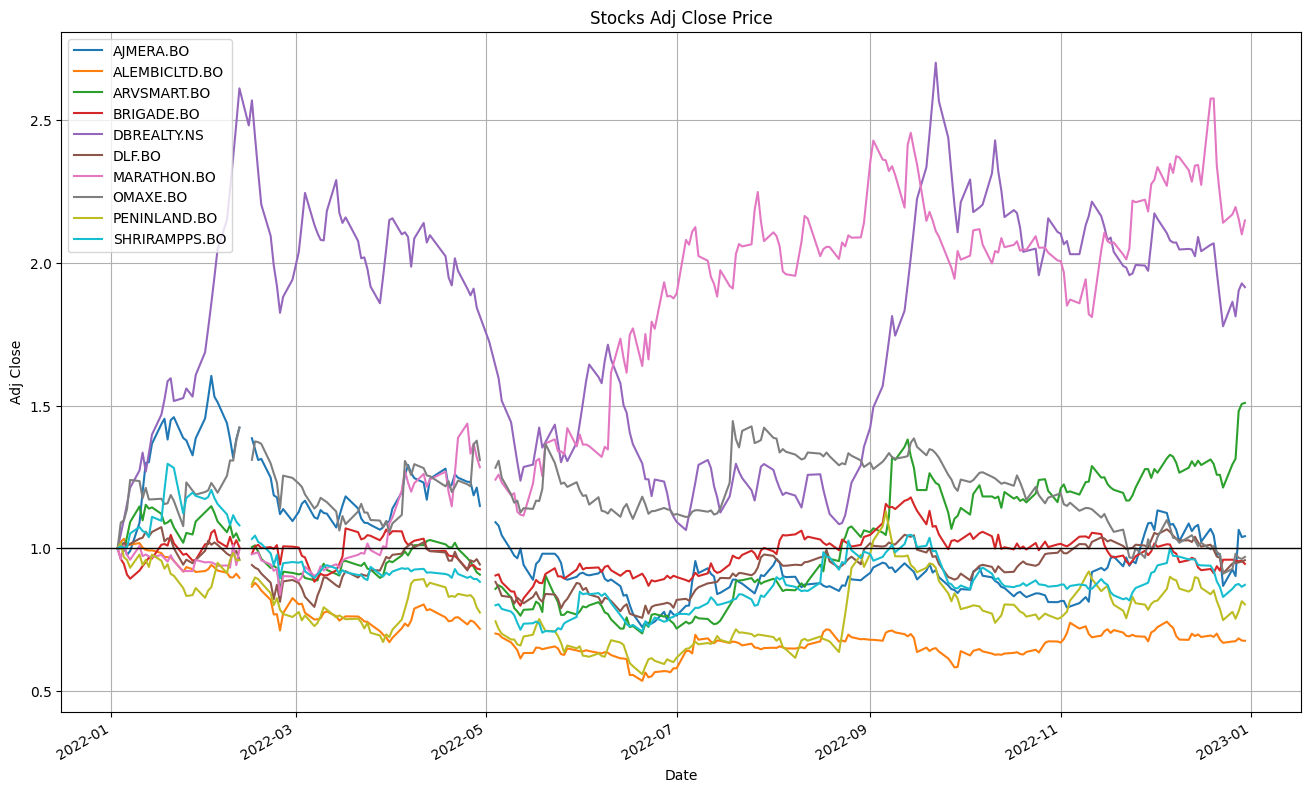

AJMERA.BO  ALEMBICLTD.BO  ARVSMART.BO  BRIGADE.BO  DBREALTY.NS  \
AJMERA.BO       1.000000       0.793156     0.159548    0.119350     0.305301   
ALEMBICLTD.BO   0.793156       1.000000     0.212259    0.137264     0.079094   
ARVSMART.BO     0.159548       0.212259     1.000000    0.526532     0.589220   
BRIGADE.BO      0.119350       0.137264     0.526532    1.000000     0.418991   
DBREALTY.NS     0.305301       0.079094     0.589220    0.418991     1.000000   
DLF.BO          0.368032       0.488979     0.775488    0.615025     0.333608   
MARATHON.BO    -0.648899      -0.604392     0.402408    0.242474    -0.021969   
OMAXE.BO        0.028786       0.025504    -0.214482    0.366853    -0.099730   
PENINLAND.BO    0.471354       0.605558     0.666988    0.533308     0.415623   
SHRIRAMPPS.BO   0.713668       0.785344     0.476911    0.528489     0.289323   

                 DLF.BO  MARATHON.BO  OMAXE.BO  PENINLAND.BO  SHRIRAMPPS.BO  
AJMERA.BO      0.368032    -0.648899  0.028786      0.471354       0.713668  
ALEMBICLTD.BO  0.488979    -0.604392  0.025504      0.605558       0.785344  
ARVSMART.BO    0.775488     0.402408 -0.214482      0.666988       0.476911  
BRIGADE.BO     0.615025     0.242474  0.366853      0.533308       0.528489  
DBREALTY.NS    0.333608    -0.021969 -0.099730      0.415623       0.289323  
DLF.BO         1.000000     0.234273  0.003328      0.743236       0.656832  
MARATHON.BO    0.234273     1.000000 -0.047154     -0.010161      -0.272346  
OMAXE.BO       0.003328    -0.047154  1.000000      0.112295       0.161851  
PENINLAND.BO   0.743236    -0.010161  0.112295      1.000000       0.723368  
SHRIRAMPPS.BO  0.656832    -0.272346  0.161851      0.723368       1.000000

In [37]:
normalize_stocks = data.apply(lambda x: x / x[0])
normalize_stocks.plot(figsize=(16, 10)).axhline(1, lw=1, color='black')
plt.xlabel("Date")
plt.ylabel("Adj Close")
plt.grid()
plt.title("Stocks Adj Close Price")
plt.show()
# display(data.plot(figsize=(16,10)))
corr_rest = data.corr()
display(corr_rest)


AJMERA.BO      ALEMBICLTD.BO    0.793156
               ARVSMART.BO      0.159548
               BRIGADE.BO       0.119350
               DBREALTY.NS      0.305301
               DLF.BO           0.368032
                                  ...   
SHRIRAMPPS.BO  DBREALTY.NS      0.289323
               DLF.BO           0.656832
               MARATHON.BO      0.272346
               OMAXE.BO         0.161851
               PENINLAND.BO     0.723368
Length: 90, dtype: float64

**************** All companies corr **************


AJMERA.BO      ALEMBICLTD.BO    0.793156
ALEMBICLTD.BO  SHRIRAMPPS.BO    0.785344
ARVSMART.BO    DLF.BO           0.775488
DLF.BO         PENINLAND.BO     0.743236
PENINLAND.BO   SHRIRAMPPS.BO    0.723368
AJMERA.BO      SHRIRAMPPS.BO    0.713668
ARVSMART.BO    PENINLAND.BO     0.666988
DLF.BO         SHRIRAMPPS.BO    0.656832
AJMERA.BO      MARATHON.BO      0.648899
BRIGADE.BO     DLF.BO           0.615025
ALEMBICLTD.BO  PENINLAND.BO     0.605558
               MARATHON.BO      0.604392
ARVSMART.BO    DBREALTY.NS      0.589220
BRIGADE.BO     PENINLAND.BO     0.533308
               SHRIRAMPPS.BO    0.528489
ARVSMART.BO    BRIGADE.BO       0.526532
ALEMBICLTD.BO  DLF.BO           0.488979
ARVSMART.BO    SHRIRAMPPS.BO    0.476911
AJMERA.BO      PENINLAND.BO     0.471354
BRIGADE.BO     DBREALTY.NS      0.418991
DBREALTY.NS    PENINLAND.BO     0.415623
ARVSMART.BO    MARATHON.BO      0.402408
AJMERA.BO      DLF.BO           0.368032
BRIGADE.BO     OMAXE.BO         0.366853
DBREALTY.NS    D

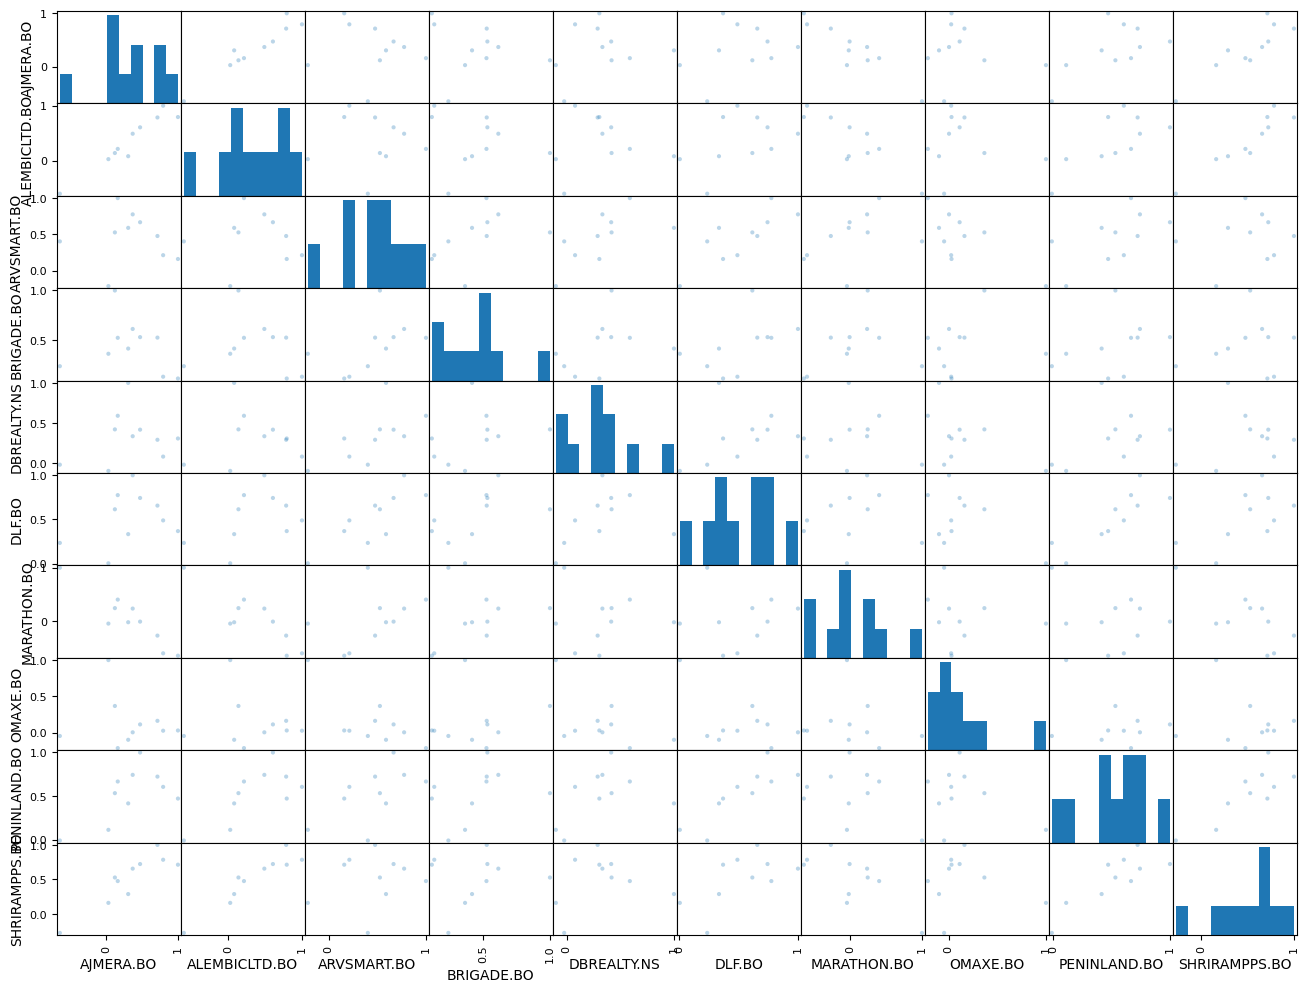

In [38]:
pair_value = corr_rest.abs().unstack()
pair_value=pair_value[pair_value.values!=1]
pair_value.sort_values(ascending=False)
display(pair_value)
pair_value = pair_value.drop_duplicates()
print("**************** All companies corr **************")
display(pair_value.sort_values(ascending=False))

from pandas.plotting import scatter_matrix
scatter_matrix(corr_rest, figsize=(16,12), alpha=0.3);


            AJMERA.BO  ALEMBICLTD.BO  ARVSMART.BO  BRIGADE.BO  DBREALTY.NS  \
Date                                                                         
2022-01-04   0.019555       0.021810     0.010963   -0.037071     0.049080   
2022-01-05  -0.007705       0.011807    -0.019843   -0.017882     0.049708   
2022-01-06  -0.034033      -0.020646     0.049906   -0.039627     0.049211   
2022-01-07   0.013853       0.000458     0.050000   -0.015836     0.049558   
2022-01-10   0.099865       0.005497     0.049968    0.031955     0.049747   
...               ...            ...          ...         ...          ...   
2022-12-26   0.066576       0.007102     0.066910    0.000106     0.048304   
2022-12-27  -0.025478       0.001410     0.015318   -0.002856    -0.027427   
2022-12-28   0.179645       0.014789     0.126908   -0.002652     0.049633   
2022-12-29  -0.023745      -0.011103     0.017011    0.001170     0.013434   
2022-12-30   0.002919      -0.001403     0.002323   -0.010943   

AJMERA.BO       2022-12-23
ALEMBICLTD.BO   2022-06-16
ARVSMART.BO     2022-02-24
BRIGADE.BO      2022-03-07
DBREALTY.NS     2022-03-15
DLF.BO          2022-02-24
MARATHON.BO     2022-02-24
OMAXE.BO        2022-02-15
PENINLAND.BO    2022-02-15
SHRIRAMPPS.BO   2022-01-24
dtype: datetime64[ns]

Best Single Day Gain


AJMERA.BO       2022-12-28
ALEMBICLTD.BO   2022-07-04
ARVSMART.BO     2022-09-08
BRIGADE.BO      2022-03-17
DBREALTY.NS     2022-05-31
DLF.BO          2022-02-25
MARATHON.BO     2022-06-10
OMAXE.BO        2022-07-19
PENINLAND.BO    2022-08-26
SHRIRAMPPS.BO   2022-08-17
dtype: datetime64[ns]

returns std dev


AJMERA.BO        0.036344
ALEMBICLTD.BO    0.024718
ARVSMART.BO      0.033722
BRIGADE.BO       0.023379
DBREALTY.NS      0.038014
DLF.BO           0.022976
MARATHON.BO      0.040287
OMAXE.BO         0.034746
PENINLAND.BO     0.033385
SHRIRAMPPS.BO    0.028205
dtype: float64

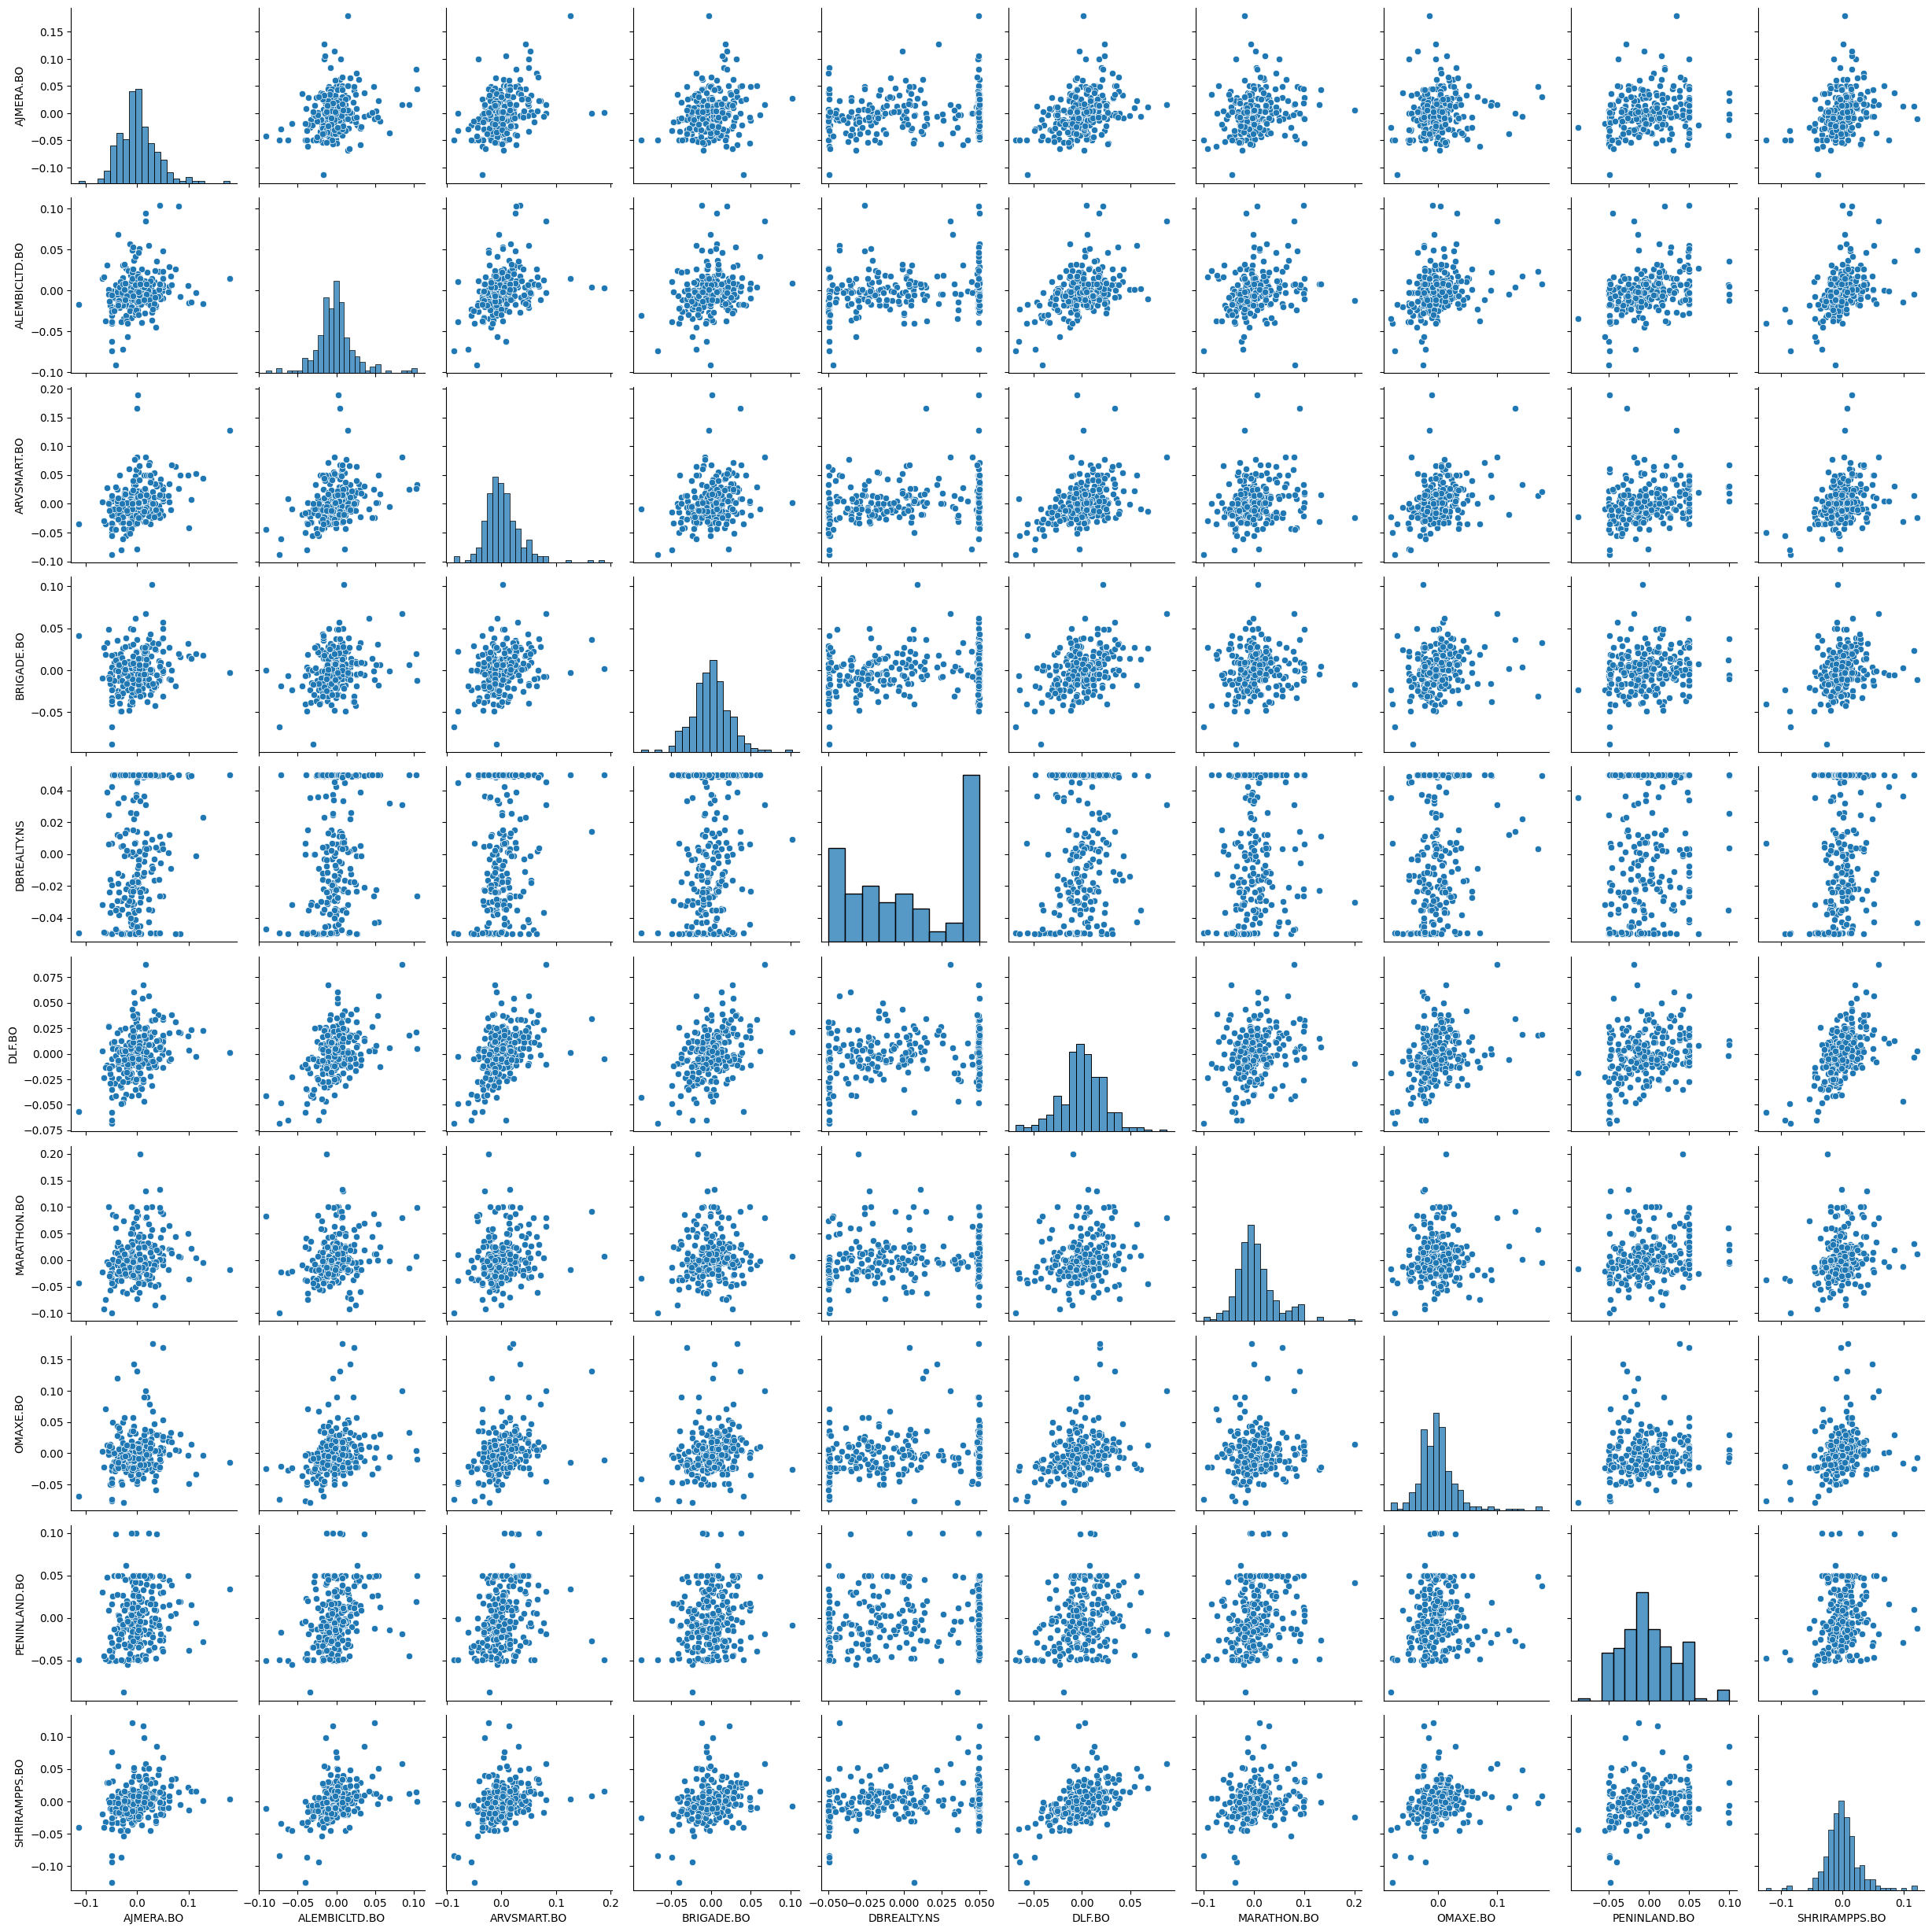

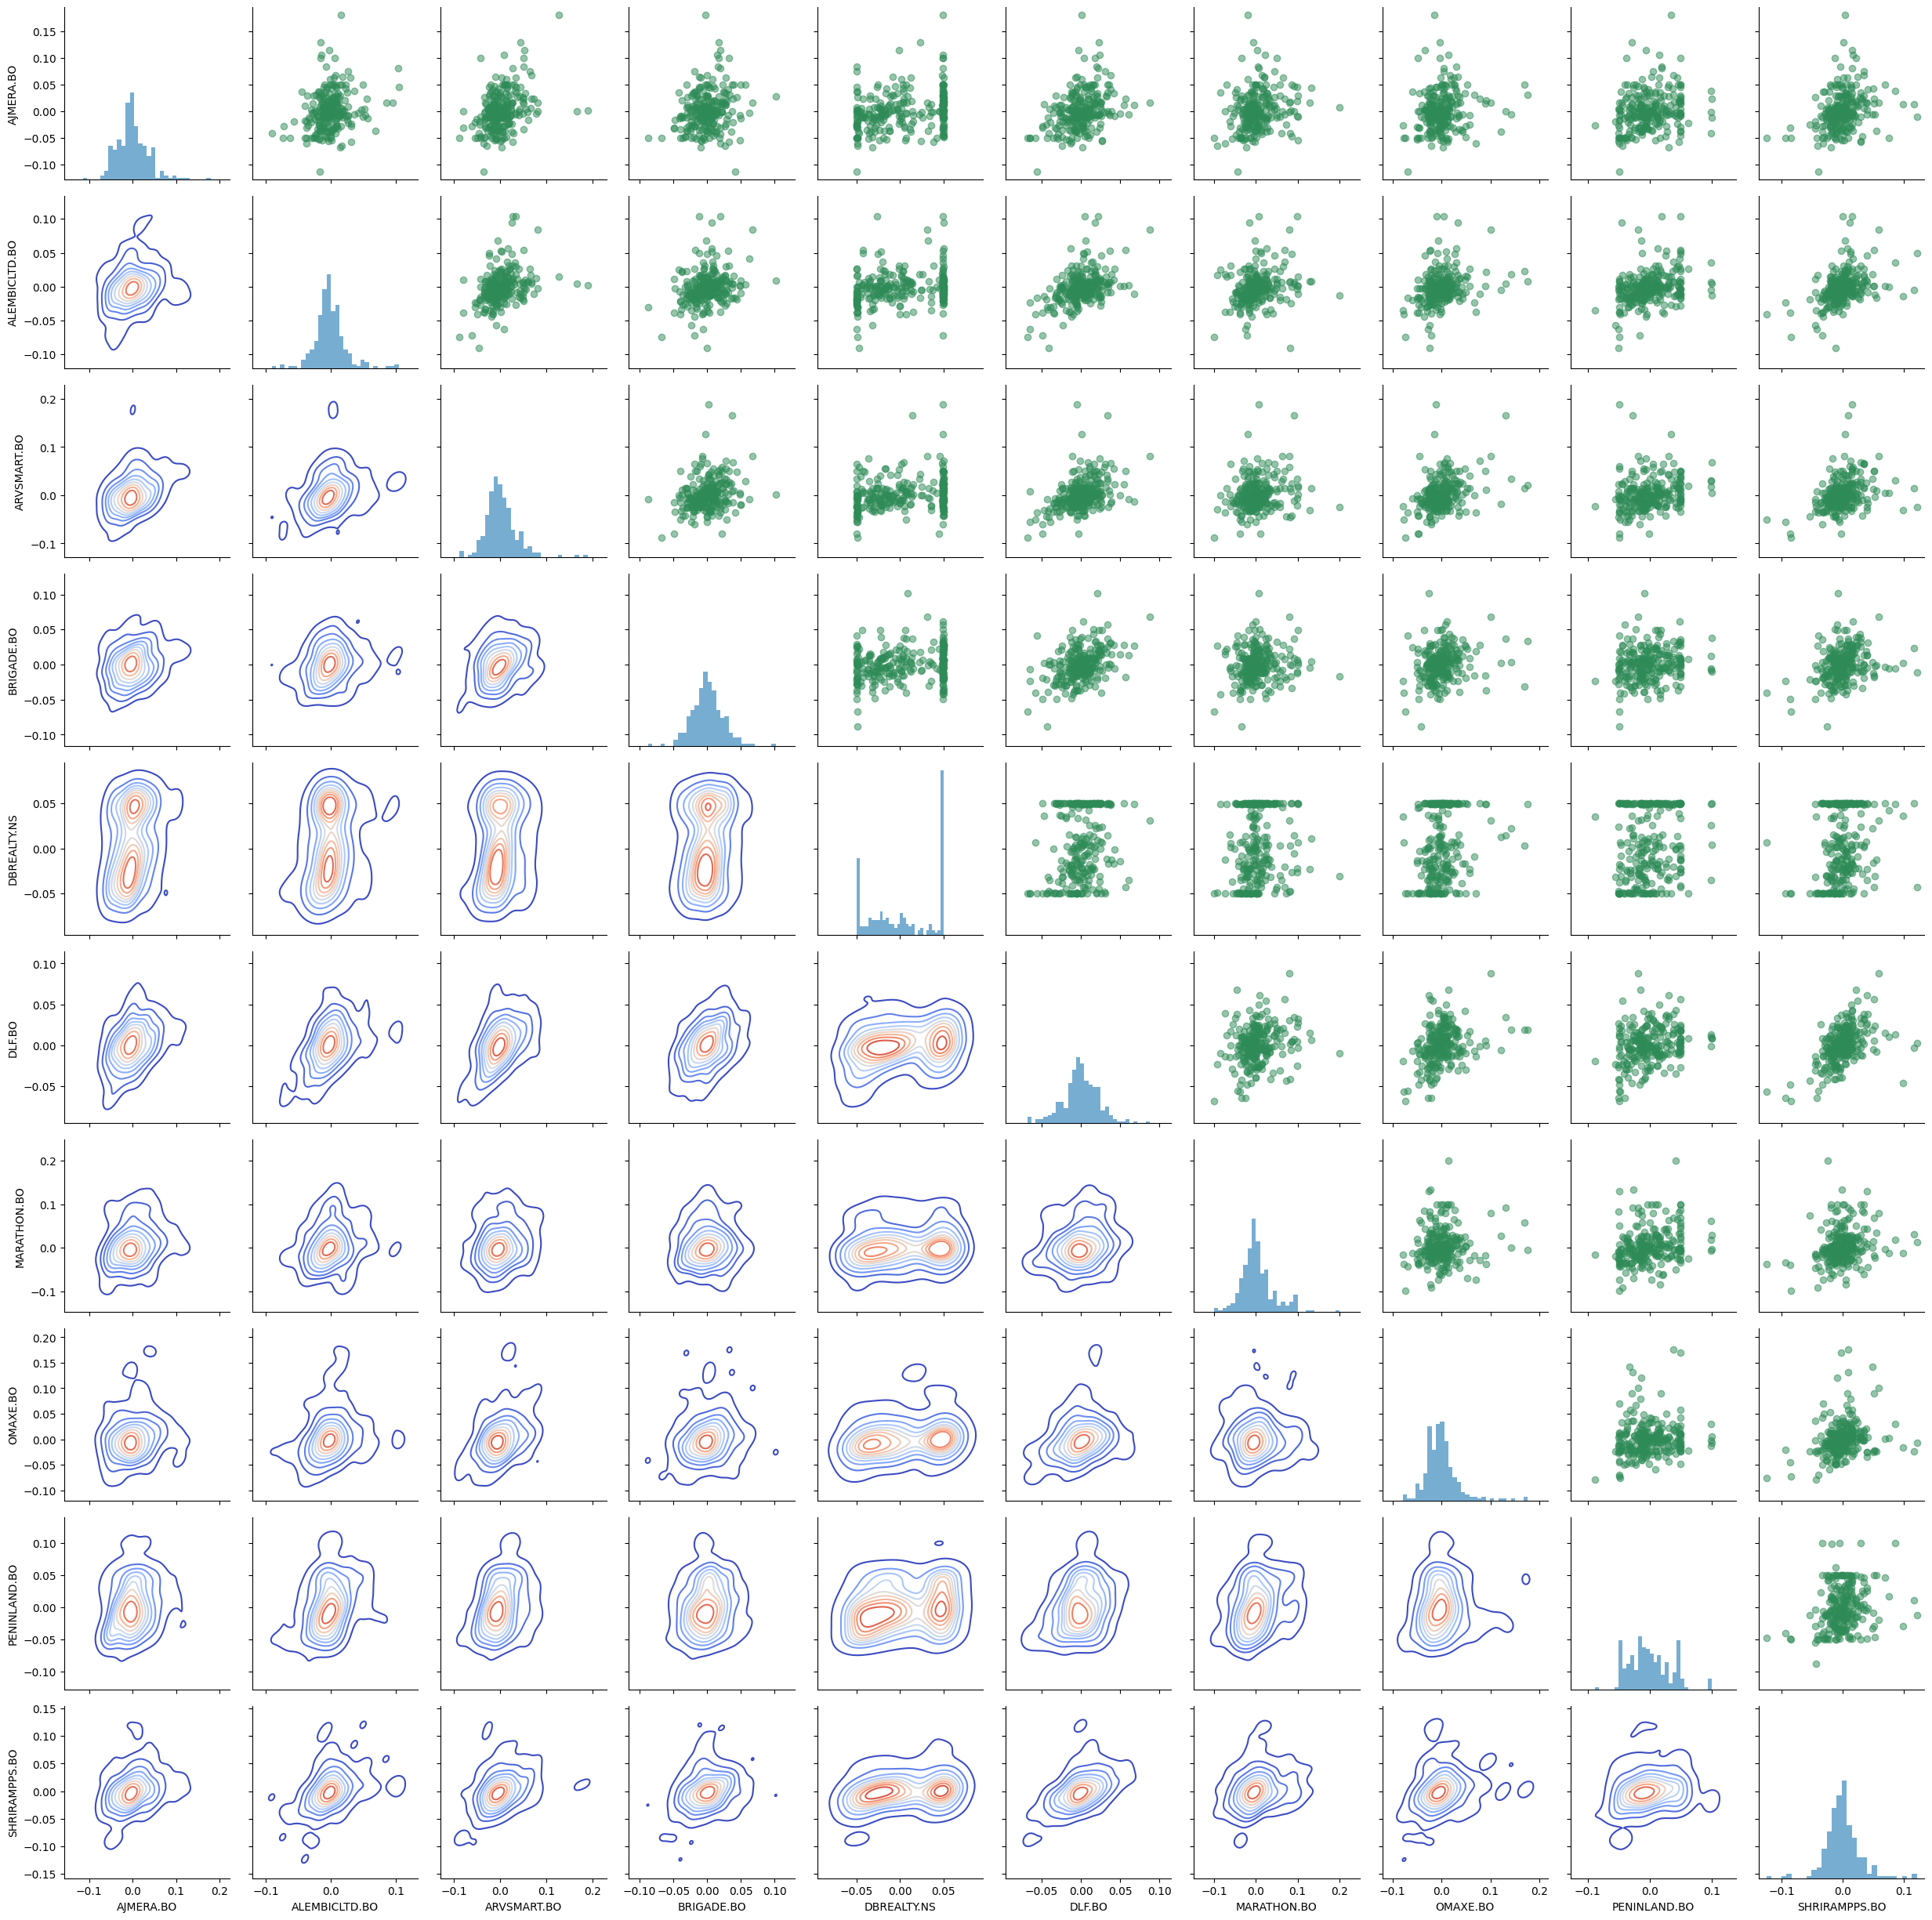

In [57]:
# Returns

returns = data.pct_change()
returns = returns.dropna()
print(returns)

print("Worst Single Day Returns")
display(returns.idxmin())

print("Best Single Day Gain")
display(returns.idxmax())

print("returns std dev")
display(returns.std())
display(sns.pairplot(returns))


returns_fig = sns.PairGrid(returns)
returns_fig.map_upper(plt.scatter,color='seagreen',alpha=0.5)
returns_fig.map_lower(sns.kdeplot,cmap='coolwarm')
returns_fig.map_diag(plt.hist,bins=30, alpha=0.6)


<Axes: >

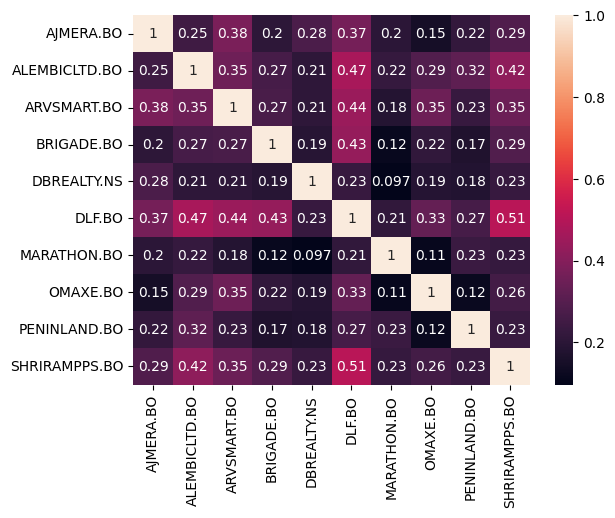

In [40]:
display(sns.heatmap(returns.corr(),annot=True))

In [41]:
rest_rets = returns.corr()
rest_rets


AJMERA.BO  ALEMBICLTD.BO  ARVSMART.BO  BRIGADE.BO  DBREALTY.NS  \
AJMERA.BO       1.000000       0.245610     0.375618    0.203483     0.275825   
ALEMBICLTD.BO   0.245610       1.000000     0.353580    0.265005     0.207809   
ARVSMART.BO     0.375618       0.353580     1.000000    0.269837     0.206684   
BRIGADE.BO      0.203483       0.265005     0.269837    1.000000     0.188919   
DBREALTY.NS     0.275825       0.207809     0.206684    0.188919     1.000000   
DLF.BO          0.366052       0.471642     0.443564    0.432296     0.227931   
MARATHON.BO     0.199286       0.224299     0.181469    0.115405     0.096648   
OMAXE.BO        0.149174       0.289841     0.348327    0.215974     0.187626   
PENINLAND.BO    0.217912       0.318663     0.229817    0.173292     0.181142   
SHRIRAMPPS.BO   0.285605       0.420748     0.346356    0.288811     0.228372   

                 DLF.BO  MARATHON.BO  OMAXE.BO  PENINLAND.BO  SHRIRAMPPS.BO  
AJMERA.BO      0.366052     0.199286  0.149174      0.217912       0.285605  
ALEMBICLTD.BO  0.471642     0.224299  0.289841      0.318663       0.420748  
ARVSMART.BO    0.443564     0.181469  0.348327      0.229817       0.346356  
BRIGADE.BO     0.432296     0.115405  0.215974      0.173292       0.288811  
DBREALTY.NS    0.227931     0.096648  0.187626      0.181142       0.228372  
DLF.BO         1.000000     0.214324  0.331147      0.265623       0.506025  
MARATHON.BO    0.214324     1.000000  0.111266      0.234797       0.225278  
OMAXE.BO       0.331147     0.111266  1.000000      0.118501       0.258913  
PENINLAND.BO   0.265623     0.234797  0.118501      1.000000       0.233974  
SHRIRAMPPS.BO  0.506025     0.225278  0.258913      0.233974       1.000000

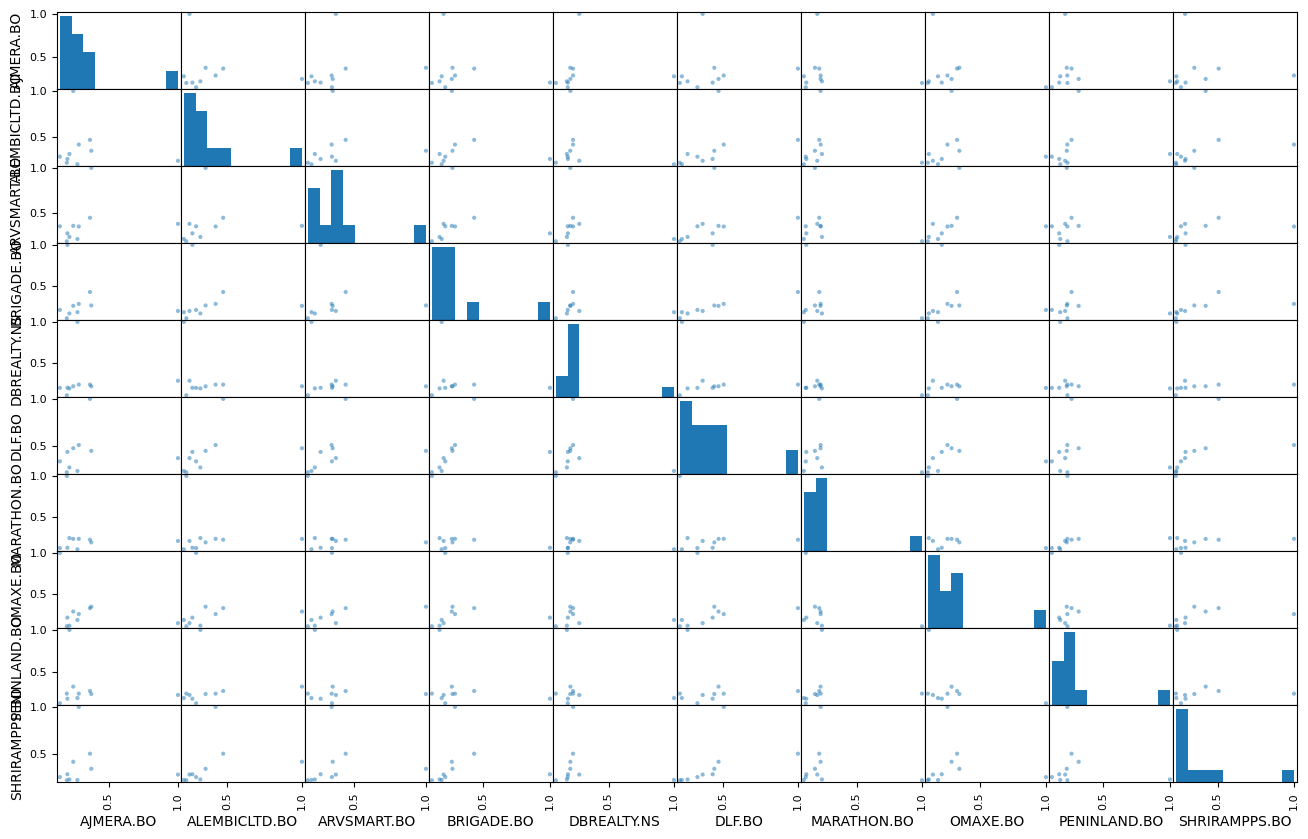

In [42]:
#Plot Scatter Matrix
scatter_matrix(rest_rets, figsize=(16, 10))
plt.show()


array([[<Axes: title={'center': 'AJMERA.BO'}>,
        <Axes: title={'center': 'ALEMBICLTD.BO'}>,
        <Axes: title={'center': 'ARVSMART.BO'}>],
       [<Axes: title={'center': 'BRIGADE.BO'}>,
        <Axes: title={'center': 'DBREALTY.NS'}>,
        <Axes: title={'center': 'DLF.BO'}>],
       [<Axes: title={'center': 'MARATHON.BO'}>,
        <Axes: title={'center': 'OMAXE.BO'}>,
        <Axes: title={'center': 'PENINLAND.BO'}>],
       [<Axes: title={'center': 'SHRIRAMPPS.BO'}>, <Axes: >, <Axes: >]],
      dtype=object)

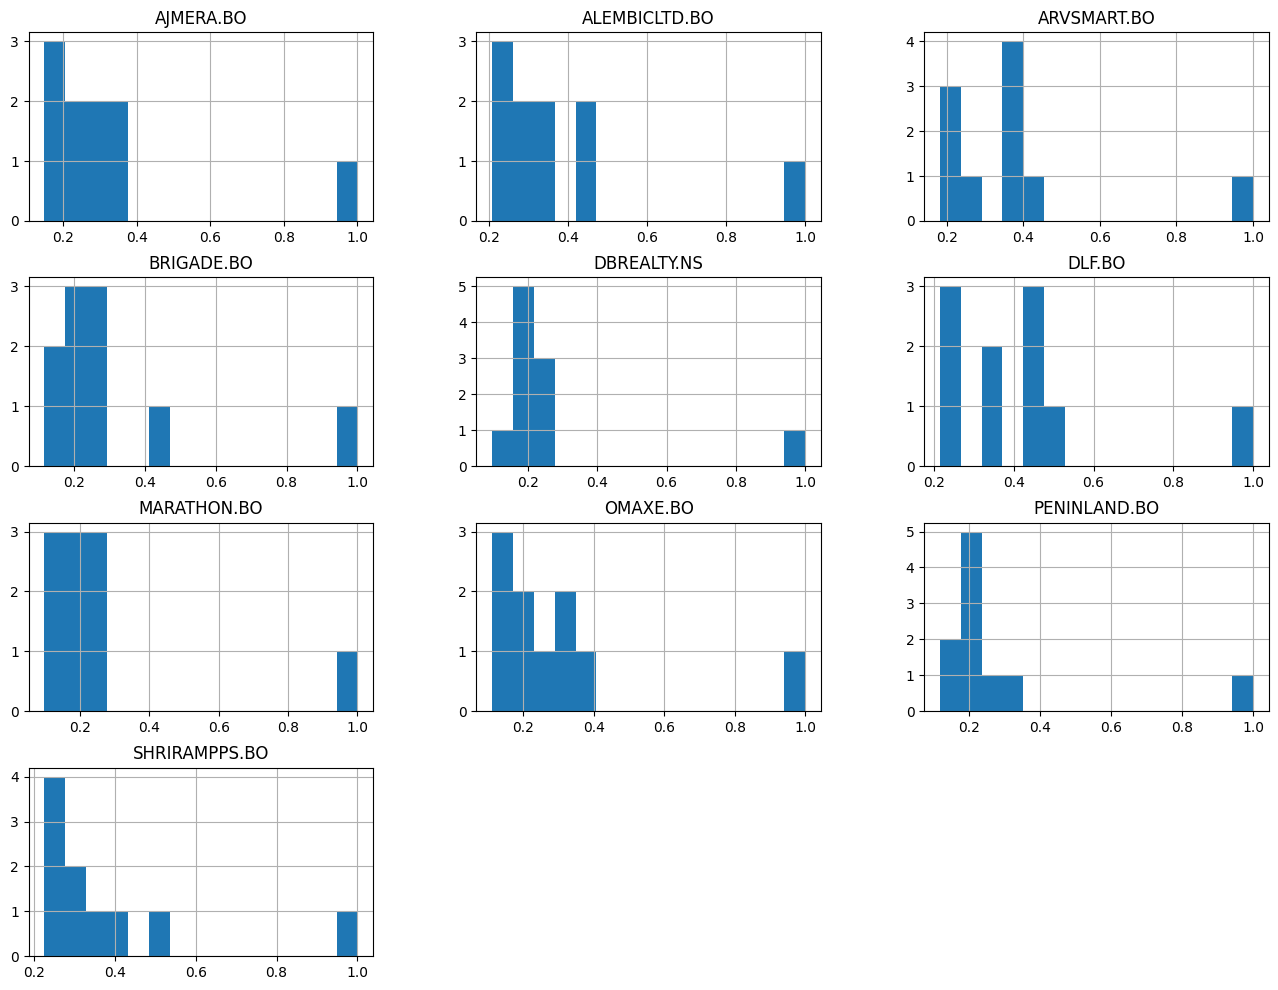

In [43]:
rest_rets.hist(bins=15, figsize=(16,12))

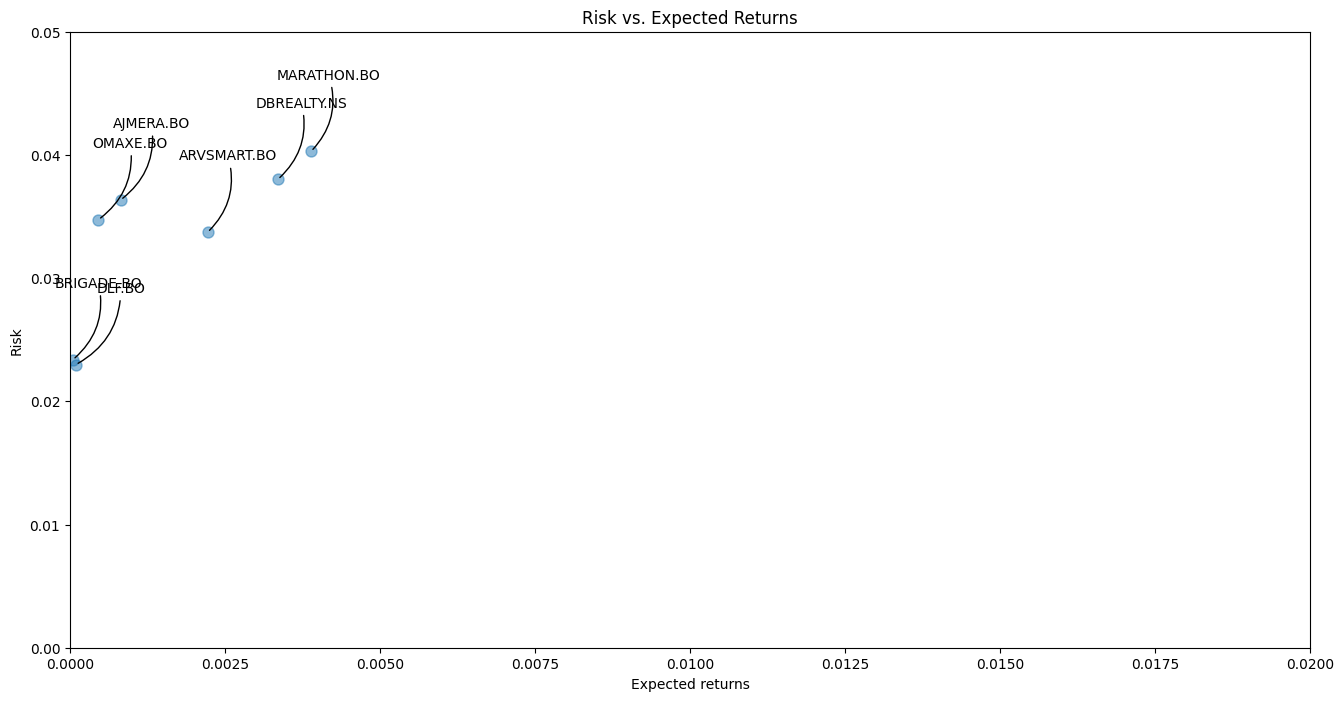

In [44]:
rets = returns.dropna()

area = np.pi*20
plt.figure(figsize=(16, 8))
plt.scatter(rets.mean(), rets.std(), alpha=0.5, s=area)

# Set the x and y limits of the plot
plt.ylim([0.0, 0.05])
plt.xlim([0.0, 0.02])

#Set the plot titles for x and y axis
plt.xlabel('Expected returns')
plt.ylabel('Risk')
plt.title("Risk vs. Expected Returns")

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label,
        xy=(x, y), xytext=(50, 50),
        textcoords='offset points', ha='right', va='bottom',
        arrowprops=dict(arrowstyle='-', connectionstyle='arc3,rad=-0.3'))


In [45]:
rest_rets = returns.corr()
pair_value = rest_rets.abs().unstack()
pair_value.sort_values(ascending=False)

# Normalized Returns Data
Normalized_Value = ((returns[:] - returns[:].min()) /
                    (returns[:].max() - returns[:].min()))


AJMERA.BO      AJMERA.BO        1.000000
ALEMBICLTD.BO  ALEMBICLTD.BO    1.000000
PENINLAND.BO   PENINLAND.BO     1.000000
OMAXE.BO       OMAXE.BO         1.000000
MARATHON.BO    MARATHON.BO      1.000000
                                  ...   
BRIGADE.BO     MARATHON.BO      0.115405
OMAXE.BO       MARATHON.BO      0.111266
MARATHON.BO    OMAXE.BO         0.111266
DBREALTY.NS    MARATHON.BO      0.096648
MARATHON.BO    DBREALTY.NS      0.096648
Length: 100, dtype: float64

In [58]:
normalized_rets = Normalized_Value.corr()
normalized_pair_value = normalized_rets.abs().unstack()
normalized_pair_value.sort_values(ascending=False)


AJMERA.BO      AJMERA.BO        1.000000
ALEMBICLTD.BO  ALEMBICLTD.BO    1.000000
PENINLAND.BO   PENINLAND.BO     1.000000
OMAXE.BO       OMAXE.BO         1.000000
MARATHON.BO    MARATHON.BO      1.000000
                                  ...   
BRIGADE.BO     MARATHON.BO      0.115405
OMAXE.BO       MARATHON.BO      0.111266
MARATHON.BO    OMAXE.BO         0.111266
DBREALTY.NS    MARATHON.BO      0.096648
MARATHON.BO    DBREALTY.NS      0.096648
Length: 100, dtype: float64

In [49]:

stocks = pd.read_csv('MortgageFinance.csv')
stocks = list((stocks.sort_values(by=["Market Cap"]))["Symbol"])[0:10]

relate_industry = pdr.get_data_yahoo(stocks, start, end)["Adj Close"]
relate_industry




[*********************100%%**********************]  10 of 10 completed


AAVAS.BO    APTUS.BO  CANFINHOME.BO  GICHSGFIN.BO  \
Date                                                               
2022-01-03  2629.949951  344.862579     569.351929    143.265671   
2022-01-04  2772.300049  341.439270     576.892456    143.785782   
2022-01-05  2929.699951  339.752411     588.004639    147.426514   
2022-01-06  2814.250000  356.075226     583.738281    145.156952   
2022-01-07  2824.149902  354.686035     579.670410    143.596664   
...                 ...         ...            ...           ...   
2022-12-26  1848.099976  285.773041     513.950500    178.940155   
2022-12-27  1838.550049  293.562347     526.734619    181.232391   
2022-12-28  1844.949951  291.428986     523.551025    179.379089   
2022-12-29  1858.900024  310.827820     527.480774    188.938187   
2022-12-30  1845.449951  302.095856     532.355591    207.422318   

            HOMEFIRST.BO  IBULHSGFIN.BO  LICHSGFIN.NS  PNBHOUSING.NS  \
Date                                                                   
2022-01-03    782.650024     219.460342    364.461060     490.649994   
2022-01-04    825.049988     216.281189    364.268951     489.950012   
2022-01-05    815.849976     215.238037    366.286255     489.500000   
2022-01-06    789.349976     220.354477    364.605164     484.049988   
2022-01-07    798.200012     218.913940    361.194946     476.799988   
...                  ...            ...           ...            ...   
2022-12-26    706.750000     139.385635    399.680511     487.750000   
2022-12-27    729.500000     147.979248    405.560333     509.549988   
2022-12-28    722.700012     146.489029    408.157257     503.450012   
2022-12-29    731.500000     154.536255    407.618286     503.000000   
2022-12-30    731.799988     153.592438    405.854309     533.549988   

            REPCOHOME.BO  TFL.BO  
Date                              
2022-01-03    261.804840    8.56  
2022-01-04    273.878387    8.98  
2022-01-05    268.159332    9.42  
2022-01-06    264.884338    9.89  
2022-01-07    255.890289   10.38  
...                  ...     ...  
2022-12-26    213.965836   10.10  
2022-12-27    223.896957   10.37  
2022-12-28    221.116241   10.05  
2022-12-29    223.102463     NaN  
2022-12-30    229.557693     NaN  

[248 rows x 10 columns]

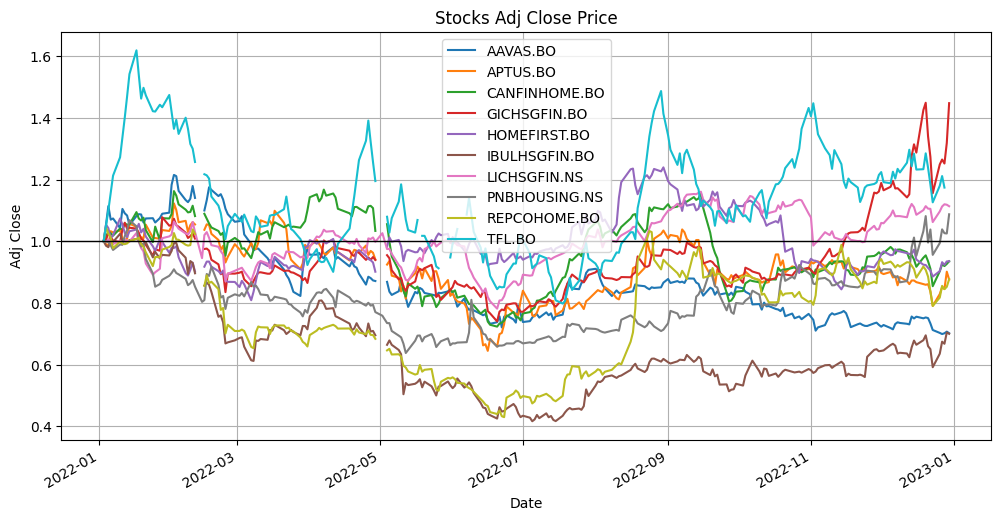

In [50]:
normalize_stocks = relate_industry.apply(lambda x: x / x[0])
normalize_stocks.plot(figsize=(12, 6)).axhline(1, lw=1, color='black')
plt.xlabel("Date")
plt.ylabel("Adj Close")
plt.grid()
plt.title("Stocks Adj Close Price")
plt.show()


In [51]:
corr_drinks = relate_industry.corr()
corr_drinks


AAVAS.BO  APTUS.BO  CANFINHOME.BO  GICHSGFIN.BO  HOMEFIRST.BO  \
AAVAS.BO       1.000000  0.687040       0.603148     -0.006585     -0.029055   
APTUS.BO       0.687040  1.000000       0.762717      0.296984      0.029268   
CANFINHOME.BO  0.603148  0.762717       1.000000      0.338740      0.218590   
GICHSGFIN.BO  -0.006585  0.296984       0.338740      1.000000     -0.136166   
HOMEFIRST.BO  -0.029055  0.029268       0.218590     -0.136166      1.000000   
IBULHSGFIN.BO  0.779002  0.774657       0.666505      0.455025     -0.101287   
LICHSGFIN.NS  -0.112019  0.321827       0.373784      0.542702      0.425280   
PNBHOUSING.NS  0.252147  0.484805       0.364124      0.776918     -0.204642   
REPCOHOME.BO   0.327258  0.685306       0.532698      0.634009      0.188469   
TFL.BO         0.270988  0.606434       0.401042      0.527803      0.055503   

               IBULHSGFIN.BO  LICHSGFIN.NS  PNBHOUSING.NS  REPCOHOME.BO  \
AAVAS.BO            0.779002     -0.112019       0.252147      0.327258   
APTUS.BO            0.774657      0.321827       0.484805      0.685306   
CANFINHOME.BO       0.666505      0.373784       0.364124      0.532698   
GICHSGFIN.BO        0.455025      0.542702       0.776918      0.634009   
HOMEFIRST.BO       -0.101287      0.425280      -0.204642      0.188469   
IBULHSGFIN.BO       1.000000      0.149606       0.674114      0.648098   
LICHSGFIN.NS        0.149606      1.000000       0.469983      0.650970   
PNBHOUSING.NS       0.674114      0.469983       1.000000      0.755159   
REPCOHOME.BO        0.648098      0.650970       0.755159      1.000000   
TFL.BO              0.590786      0.422589       0.626286      0.782570   

                 TFL.BO  
AAVAS.BO       0.270988  
APTUS.BO       0.606434  
CANFINHOME.BO  0.401042  
GICHSGFIN.BO   0.527803  
HOMEFIRST.BO   0.055503  
IBULHSGFIN.BO  0.590786  
LICHSGFIN.NS   0.422589  
PNBHOUSING.NS  0.626286  
REPCOHOME.BO   0.782570  
TFL.BO         1.000000

In [52]:
main_industry = data
for i in stocks:
    main_industry = main_industry.join(relate_industry[i])
    # main_industry_rets = main_industry.pct_change().dropna()
    main_industry_rets = main_industry
display(main_industry_rets.head())
main_industry_rets = main_industry_rets.corr()
pair_value_1 = main_industry_rets.abs().unstack()
pair_value_1 = pair_value_1[pair_value_1.values != 1]
pair_value_1 = pair_value_1.sort_values(ascending=False)
display(pair_value_1[0:50])
print("last 50")
display(pair_value_1[pair_value_1.values > 0.2][-50:-1])
# display(pair_value_1[-50:-1])


AJMERA.BO  ALEMBICLTD.BO  ARVSMART.BO  BRIGADE.BO  DBREALTY.NS  \
Date                                                                          
2022-01-03  294.292969     105.199707   212.247284  490.422760    48.900002   
2022-01-04  300.048004     107.494080   214.574234  472.242401    51.299999   
2022-01-05  297.736145     108.763313   210.316406  463.797974    53.849998   
2022-01-06  287.603394     106.517746   220.812424  445.418884    56.500000   
2022-01-07  291.587616     106.566566   231.853043  438.365295    59.299999   

                DLF.BO  MARATHON.BO   OMAXE.BO  PENINLAND.BO  SHRIRAMPPS.BO  \
Date                                                                          
2022-01-03  391.369568   106.831696  75.900002     16.200001      85.849998   
2022-01-04  391.171112   102.799370  82.750000     16.500000      86.449997   
2022-01-05  399.207855   107.926895  83.349998     15.700000      86.000000   
2022-01-06  395.487152   104.442169  86.349998     15.550000      86.000000   
2022-01-07  397.620361   102.600250  94.099998     15.100000      90.349998   

            GICHSGFIN.BO  CANFINHOME.BO     AAVAS.BO    APTUS.BO  \
Date                                                               
2022-01-03    143.265671     569.351929  2629.949951  344.862579   
2022-01-04    143.785782     576.892456  2772.300049  341.439270   
2022-01-05    147.426514     588.004639  2929.699951  339.752411   
2022-01-06    145.156952     583.738281  2814.250000  356.075226   
2022-01-07    143.596664     579.670410  2824.149902  354.686035   

            PNBHOUSING.NS  REPCOHOME.BO  LICHSGFIN.NS  TFL.BO  HOMEFIRST.BO  \
Date                                                                          
2022-01-03     490.649994    261.804840    364.461060    8.56    782.650024   
2022-01-04     489.950012    273.878387    364.268951    8.98    825.049988   
2022-01-05     489.500000    268.159332    366.286255    9.42    815.849976   
2022-01-06     484.049988    264.884338    364.605164    9.89    789.349976   
2022-01-07     476.799988    255.890289    361.194946   10.38    798.200012   

            IBULHSGFIN.BO  
Date                       
2022-01-03     219.460342  
2022-01-04     216.281189  
2022-01-05     215.238037  
2022-01-06     220.354477  
2022-01-07     218.913940

ALEMBICLTD.BO  IBULHSGFIN.BO    0.926592
IBULHSGFIN.BO  ALEMBICLTD.BO    0.926592
               AJMERA.BO        0.851473
AJMERA.BO      IBULHSGFIN.BO    0.851473
REPCOHOME.BO   PENINLAND.BO     0.829581
PENINLAND.BO   REPCOHOME.BO     0.829581
REPCOHOME.BO   ARVSMART.BO      0.818882
ARVSMART.BO    REPCOHOME.BO     0.818882
SHRIRAMPPS.BO  IBULHSGFIN.BO    0.816883
IBULHSGFIN.BO  SHRIRAMPPS.BO    0.816883
ARVSMART.BO    LICHSGFIN.NS     0.801701
LICHSGFIN.NS   ARVSMART.BO      0.801701
AAVAS.BO       ALEMBICLTD.BO    0.797200
ALEMBICLTD.BO  AAVAS.BO         0.797200
               AJMERA.BO        0.793156
AJMERA.BO      ALEMBICLTD.BO    0.793156
DLF.BO         REPCOHOME.BO     0.786741
REPCOHOME.BO   DLF.BO           0.786741
SHRIRAMPPS.BO  ALEMBICLTD.BO    0.785344
ALEMBICLTD.BO  SHRIRAMPPS.BO    0.785344
REPCOHOME.BO   TFL.BO           0.782570
TFL.BO         REPCOHOME.BO     0.782570
AAVAS.BO       IBULHSGFIN.BO    0.779002
IBULHSGFIN.BO  AAVAS.BO         0.779002
PNBHOUSING.NS  G

last 50


ARVSMART.BO    CANFINHOME.BO    0.323431
CANFINHOME.BO  ARVSMART.BO      0.323431
LICHSGFIN.NS   APTUS.BO         0.321827
APTUS.BO       LICHSGFIN.NS     0.321827
DBREALTY.NS    AJMERA.BO        0.305301
AJMERA.BO      DBREALTY.NS      0.305301
GICHSGFIN.BO   APTUS.BO         0.296984
APTUS.BO       GICHSGFIN.BO     0.296984
SHRIRAMPPS.BO  DBREALTY.NS      0.289323
DBREALTY.NS    SHRIRAMPPS.BO    0.289323
               TFL.BO           0.287454
TFL.BO         DBREALTY.NS      0.287454
BRIGADE.BO     TFL.BO           0.276413
TFL.BO         BRIGADE.BO       0.276413
MARATHON.BO    SHRIRAMPPS.BO    0.272346
SHRIRAMPPS.BO  MARATHON.BO      0.272346
AAVAS.BO       TFL.BO           0.270988
TFL.BO         AAVAS.BO         0.270988
DBREALTY.NS    HOMEFIRST.BO     0.266529
HOMEFIRST.BO   DBREALTY.NS      0.266529
               AJMERA.BO        0.261774
AJMERA.BO      HOMEFIRST.BO     0.261774
AAVAS.BO       PNBHOUSING.NS    0.252147
PNBHOUSING.NS  AAVAS.BO         0.252147
CANFINHOME.BO  M

In [63]:
display(pair_value_1['DLF.BO']['ARVSMART.BO'])
display(pair_value_1['HOMEFIRST.BO']['DLF.BO'])


0.20337141346120396

0.7754879827407966

t-stast, pValue, criticalV :-  -1.8277134089692948 0.6161656160559931 -3.3611828529779255
cointegration is stationarity and  significant cointegration


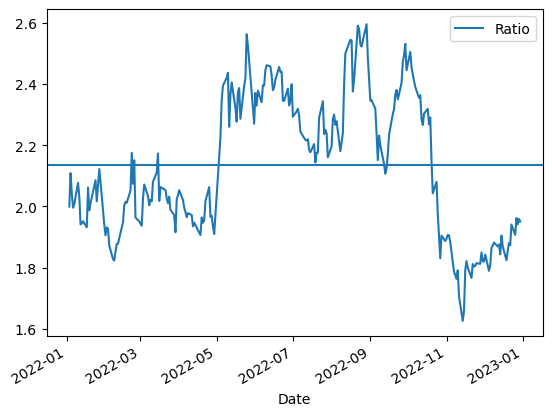

mean, stdDev 2.134816728978943 0.22815866207011629


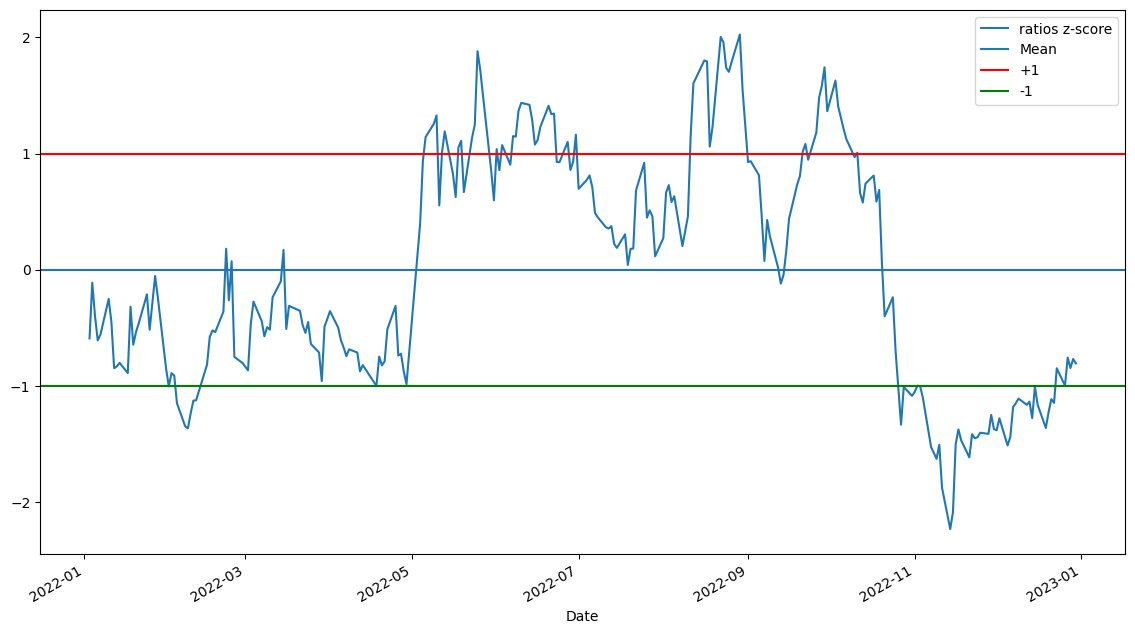

In [79]:
# Z-Value Rules Strategies
# To confirm when to enter and exit a position of pairs trading, mean spread and standard deviation of formation period should be calculated first, based on this data, calculate each day’s price spread and Z-Score.
# Entry: When the absolute value of Z-Score more than 1.
# Exit: When the absolute value of Z-Score less than -1.
import statsmodels
from statsmodels.tsa.stattools import coint

S1 = relate_industry['HOMEFIRST.BO'].dropna()
S2 = data['DLF.BO'].dropna()
t_score, pvalue, cv = coint(S1, S2)
print("t-stast, pValue, criticalV :- ",t_score,pvalue,cv[1])
if t_score>0 or t_score<cv[1]:
    """Reject the null hypothesis of stationarity at the 5% level."""
    print("insignificant cointegration")
else:
    print("cointegration is stationarity and  significant cointegration")



ratios = S1 / S2
ratios.plot()
plt.axhline(ratios.mean())
plt.legend(['Ratio'])
plt.show()



def zscore(series):
    result=(series - series.mean()) / np.std(series)
    return result


result=zscore(ratios)
ratiosStdDev=np.std(ratios)
ratiosMean=ratios.mean()
print("mean, stdDev", ratiosMean, ratiosStdDev)
result.plot(figsize=(14, 8))
plt.axhline(zscore(ratios).mean())
plt.axhline(1.0, color='red')
plt.axhline(-1.0, color='green')
plt.legend(['ratios z-score', 'Mean', '+1', '-1'])
plt.show()


[*********************100%%**********************]  2 of 2 completed


DLF.BO  HOMEFIRST.BO
Date                                
2022-01-03  391.369568    782.650024
2022-01-04  391.171112    825.049988
2022-01-05  399.207855    815.849976
2022-01-06  395.487152    789.349976
2022-01-07  397.620361    798.200012
...                ...           ...
2022-12-26  370.600006    706.750000
2022-12-27  371.799988    729.500000
2022-12-28  372.200012    722.700012
2022-12-29  373.350006    731.500000
2022-12-30  375.149994    731.799988

[246 rows x 2 columns]

DLF.BO  HOMEFIRST.BO
Date                              
2022-01-03       NaN           NaN
2022-01-04 -0.000507      0.054175
2022-01-05  0.020545     -0.011151
2022-01-06 -0.009320     -0.032481
2022-01-07  0.005394      0.011212
...              ...           ...
2022-12-26  0.038095      0.019915
2022-12-27  0.003238      0.032190
2022-12-28  0.001076     -0.009321
2022-12-29  0.003090      0.012177
2022-12-30  0.004821      0.000410

[246 rows x 2 columns]

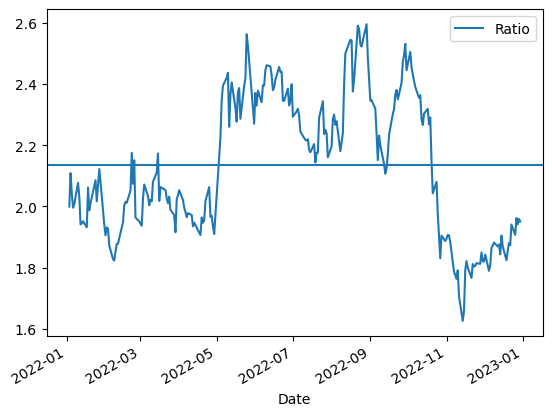

sell  HOMEFIRST.BO buy  DLF.BO
The profit%% is  0.27721300592722936
0.27721300592722936 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.01079943990859733, -0.0065925692018614646, 0, -0.04559563046673587, -0.01716237890763539, 0, 0, -0.04146979430532716, -0.005506110866406955, 0, -0.04668899570031404, -0.010370887102602366, -0.057335488505402155, 0.014773703420219553, 0.020265248206698505, 0, 0, -0.04322751356158805, 0, -0.020540398296205686, 0, -0.02339333788462372, 0.0005127410012206735, -0.021155281892113798, -0.006307564871409821, 0.0014986566924811706, 0.012222486344986239, 0.020243314652103606, -0.003590110954712622, -0.010717198054262411, -0.01697228936958972, 0.0070011388769275484, -0.0003628979425740475, 0, 0, -0.01702877767853561, 0, 0, -0.022243297184173838, 0, 0, 0, 0, 0, 0, 0

In [142]:
#backtesting

def indiZscore(num,mean,std):
    zScore=(num - mean) / std
    return zScore

def backtest(syms, ratiosMean, ratiosStdDev):
    start = '2022-01-01'
    end = '2023-01-01'

    backTest = pdr.get_data_yahoo(syms, start, end, period='1d')['Adj Close'].dropna()
    backTestReturns = backTest.pct_change()

    display(backTest)
    display(backTestReturns)

    S1 = backTest[syms[0]]
    S2 = backTest[syms[1]]
    ratios = S1 / S2
    ratios.plot()
    plt.axhline(ratios.mean())
    plt.legend(['Ratio'])
    plt.show()
    profit=0
    inTrade=False
    returns=[]
    order={}
    for i in range(0,len(ratios)):
        if i==0:
            returns.append(0)
            continue
        if i==len(ratios)-1:
            returns.append(0)
            break
        if indiZscore(ratios[i],ratiosMean,ratiosStdDev)>1:
            if not inTrade:
                if S1[i]>S2[i]:
                    print("sell ", syms[0], "buy ", syms[1])
                    order={"buy":[syms[1],S2[i]],"sell":[syms[0],S1[i]]}
                    inTrade=True
                    returns.append(0)
                else:
                    print("sell ", syms[1], "buy ", syms[0])
                    order={"buy":[syms[0],S1[i]],"sell":[syms[1],S2[i]]}
                    inTrade=True
                    returns.append(0)
            else:
                returns.append(backTestReturns[order["buy"][0]][i] + (-1*backTestReturns[order["sell"][0]][i]))
                pass
        elif indiZscore(ratios[i],ratiosMean,ratiosStdDev)<-1:
            if inTrade:
                inTrade=False
                buySym=order["buy"][0]
                sellSym=order["sell"][0]
                profit1 = (backTest[buySym][i]-order["buy"][1])/order["buy"][1]
                profit2=  (order["sell"][1]-backTest[sellSym][i])/order["sell"][1]
                profit=profit+profit1+profit2
                returns.append(backTestReturns[order["buy"][0]][i] + (-1*backTestReturns[order["sell"][0]][i]))
            else:
                returns.append(0)
                pass
        else:
            returns.append(0)
    
    print("The profit%% is ",profit)

    return profit,returns,len(returns)



profitpp,returnsArr,leng=backtest(['HOMEFIRST.BO','DLF.BO'],ratiosMean,ratiosStdDev)

print(profitpp,returnsArr,leng)



In [143]:

# Pair Measurements
# Alpha	
# Beta
# Sharpe Ratios	



# Market Data SPY
NSEI = yf.download('^NSEI',start,end)['Adj Close']

NSEI.rets = NSEI.pct_change(1).dropna()
NSEI_risk = NSEI.std()

print(len(returnsArr),(len(NSEI.rets)))

for i in range(0,(len(NSEI.rets)-len(returnsArr))):
    returnsArr.append(0)


returnsArr=np.array(returnsArr)

rf = 0.03 # risk free rate
excess_returns = returnsArr - rf
sharpe_ratio = excess_returns.mean()/excess_returns.std()
print('Sharpe Ratio: ',sharpe_ratio)



from scipy import stats

beta, alpha, r_value, p_value, std_err = stats.linregress(returnsArr, NSEI.rets)
print("Pair-Trading and NIFTY50")
print("Beta: 			%9.6f" % beta)
print("Alpha: 			%9.6f" % alpha)
print("R-Squared: 		%9.6f" % r_value)
print("p-value: 		%9.6f" % p_value)
print("Standard Error: 	%9.6f" % std_err)

[*********************100%%**********************]  1 of 1 completed
246 247
Sharpe Ratio:  -2.343407552273569
Pair-Trading and NIFTY50
Beta: 			-0.014275
Alpha: 			 0.000143
R-Squared: 		-0.017784
p-value: 		 0.780934
Standard Error: 	 0.051273
